First lets pre-process the datasets

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import data_utils
import importlib
from sklearn.preprocessing import LabelEncoder

importlib.reload(data_utils)

# Read the csv
csv_awardsPlayers, csv_coaches, csv_playersTeams, csv_players, csv_seriesPost, csv_teamsPost,csv_teams = data_utils.load_data()
pd.options.mode.use_inf_as_na = True

csv_new_teams = pd.read_csv('teste/teams.csv')
csv_new_players = pd.read_csv('teste/players_teams.csv')
csv_new_coaches = pd.read_csv('teste/coaches.csv')

# Change the tmID to unique IDs and also the same for the confID for all the dataframes

uniques_tmID = pd.concat([csv_new_teams['tmID'],csv_new_players['tmID'], csv_new_coaches['tmID'],csv_teamsPost['tmID'], csv_teams['tmID'],csv_playersTeams['tmID'],csv_coaches['tmID'],csv_seriesPost['tmIDWinner'],csv_seriesPost['tmIDLoser']]).unique()
unique_confID = pd.concat([csv_teams['confID'],csv_new_teams['confID']]).unique()
unique_playoffID = pd.concat([csv_teams['playoff']]).unique()


label_tmID = LabelEncoder()
label_tmID.fit(uniques_tmID)

csv_new_teams['tmID'] = label_tmID.transform(csv_new_teams['tmID'])
csv_new_players['tmID'] = label_tmID.transform(csv_new_players['tmID'])
csv_new_coaches['tmID'] = label_tmID.transform(csv_new_coaches['tmID'])
csv_teamsPost['tmID'] = label_tmID.transform(csv_teamsPost['tmID'])
csv_teams['tmID'] = label_tmID.transform(csv_teams['tmID'])
csv_playersTeams['tmID'] = label_tmID.transform(csv_playersTeams['tmID'])
csv_coaches['tmID'] = label_tmID.transform(csv_coaches['tmID'])
csv_seriesPost['tmIDWinner'] = label_tmID.transform(csv_seriesPost['tmIDWinner'])
csv_seriesPost['tmIDLoser'] = label_tmID.transform(csv_seriesPost['tmIDLoser'])


label_confID = LabelEncoder()
label_confID.fit(unique_confID)

csv_teams['confID'] = label_confID.transform(csv_teams['confID'])
csv_new_teams['confID'] = label_confID.transform(csv_new_teams['confID'])


label_playoffID = LabelEncoder()
label_playoffID.fit(unique_playoffID)

csv_teams['playoff'] = label_playoffID.transform(csv_teams['playoff'])

/tmp/ipykernel_5166/2935575058.py:12: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.options.mode.use_inf_as_na = True


# Series Post Cleaning

- Remove the unused columns from the Series Post CSV (lgIDWinner, lgIDLoser)

In [10]:
csv_seriesPost = data_utils.setup_seriesPost(csv_seriesPost)

# Teams Cleaning

- Remove the unused columns
- Feature Engineering to generate new columns from the ones provided like : WinRateConf, LoseRateConf
- Correlation Matrix to generate the Team Rating
- Choose the best Team Rating generated model always having in mind the Correlation with the Playoff Column (Target)

Correlation with Playoff:
rank: -6.228448781981691%
o_pf: 10.383758035872273%
o_blk: 15.850223125593727%
o_pts: 13.111865472982648%
d_dreb: 10.88343036507542%
d_pf: 11.822148543131357%
d_blk: 9.25417208663059%
d_pts: 10.789138509419372%
GP: 9.131841461785486%
min: 8.789020587498408%
winRateConf: 21.780948115682307%
winRatePost: 37.076763272217356%
o_fg_pct: 11.826214779681298%
o_ft_pct: 12.198790273187536%
o_3p_pct: 11.49728829118602%
d_fg_pct: 9.36496567962772%
d_ft_pct: 11.441849530810336%
d_3p_pct: 8.575234574033717%
o_oreb_pct: 9.751889645356346%
o_dreb_pct: 11.71981822565271%
d_oreb_pct: 10.288976409502599%
d_dreb_pct: 11.513917249990694%
asts_to_pct: 13.64801134118043%
stl_to_pct: 9.947995700769189%
d_asts_to_pct: 10.771742958474297%
d_stl_to_pct: 11.358364620809402%
post_rank: -63.19970224685307%
post_rank_cummean: -9.54816148989061%


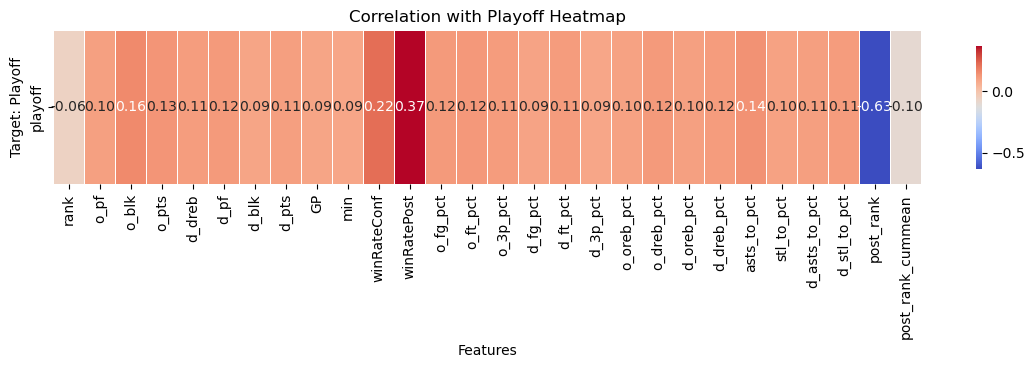

Best Model: Random Forest with Correlation: 98.92691209270926%
Correlation with Playoff:
team_rating: 98.93%
year                 0
tmID                 0
confID               0
rank                 0
playoff              0
winRateConf          0
winRatePost          0
post_rank            0
post_rank_cummean    0
team_rating          0
dtype: int64


In [11]:
csv_teams = data_utils.setup_teams(csv_teams,csv_teamsPost)

print(csv_teams.isnull().sum())

In [12]:
# Check for missing values in each column of the csv_teams dataframe
missing_values = csv_teams.isnull().sum()

# Display the missing values
for column, missing in missing_values.items():
    print(f"{column}: {missing}")

year: 0
tmID: 0
confID: 0
rank: 0
playoff: 0
winRateConf: 0
winRatePost: 0
post_rank: 0
post_rank_cummean: 0
team_rating: 0


## Players Cleaning

- Remove Columns : first season and last season;
- Remove Players that are not assigned to any team; 
- Predict the weight and the height of the players that have that attribute missing;

In [13]:
csv_players = data_utils.setup_players(csv_players,csv_playersTeams)
# csv_players = data_utils.setup_players_mean(csv_players)
csv_players = data_utils.setup_players_algorithm(csv_players)
print(csv_players.isnull().sum())

Number of missing weights: 6
KNN model average MSE: 251.01673994995826
LinearRegression model average MSE: 318.7127678257157
DecisionTree model average MSE: 240.39927332716329
RandomForest model average MSE: 230.42719665599597
Best model selected: RandomForestRegressor(random_state=42)
Number of weights predicted: 6
bioID             0
pos               0
height            0
weight            0
college          77
collegeOther    550
birthDate         0
deathDate         0
dtype: int64


/home/luisvrelvas/FEUP/4YS1/G15/G15/data_utils.py:278: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[196.82174314 158.98382531 151.64628052 196.82174314 184.05553771
 169.36091628]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  csv_players.loc[csv_players['weight'] == 0, 'weight'] = predicted_weights


# Players Teams Cleaning

- Remove the columns that aren't used
- Remove players that haven't played a single game (Games Played = 0 OR Minutes = 0)
- Generate the Player's Individual Rating using different models 
- Compare the Players' Rating generated by the different models and the one that has the most correlation with the Playoff (Target)

In [14]:
csv_playersTeams = data_utils.setup_playersTeams(csv_playersTeams,csv_awardsPlayers)

csv_playersRating = data_utils.getPlayerRating(csv_playersTeams,csv_players,csv_teams)

print(csv_playersTeams.isnull().sum())

/home/luisvrelvas/FEUP/4YS1/G15/G15/data_utils.py:400: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['player_rating'] = model.predict(X)


Random Forest Correlation with Playoff: 65.52%


/home/luisvrelvas/FEUP/4YS1/G15/G15/data_utils.py:400: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['player_rating'] = model.predict(X)
/home/luisvrelvas/FEUP/4YS1/G15/G15/data_utils.py:400: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['player_rating'] = model.predict(X)


Gradient Boosting Correlation with Playoff: 49.29%
Linear Regression Correlation with Playoff: 14.78%
Support Vector Regression Correlation with Playoff: 9.82%
Decision Tree Correlation with Playoff: 63.92%
Best Model: Random Forest with Correlation: 65.51721437420527%
playerID              0
year                  0
stint                 0
tmID                  0
GP                    0
GS                    0
minutes               0
points                0
oRebounds             0
dRebounds             0
rebounds              0
assists               0
steals                0
blocks                0
turnovers             0
PF                    0
fgAttempted           0
fgMade                0
ftAttempted           0
ftMade                0
threeAttempted        0
threeMade             0
dq                    0
PostGP                0
PostGS                0
PostMinutes           0
PostPoints            0
PostoRebounds         0
PostdRebounds         0
PostRebounds          0
PostAssist

/home/luisvrelvas/FEUP/4YS1/G15/G15/data_utils.py:400: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['player_rating'] = model.predict(X)
/home/luisvrelvas/FEUP/4YS1/G15/G15/data_utils.py:400: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['player_rating'] = model.predict(X)


# Coaches Cleaning

- Remove the coaches that have 0 wins and 0 losses (this means that the coach havent managed a single game)
- Generate Coaches Ratings considering the one with the best correlation with the target

In [15]:
csv_coaches = data_utils.setup_coaches(csv_coaches)
csv_coachesRating = data_utils.getCoachRating(csv_coaches,csv_teams)

/home/luisvrelvas/FEUP/4YS1/G15/G15/data_utils.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['coach_rating'] = model.predict(X)


Best Model: Gradient Boosting with Correlation: 53.036953332488714%


/home/luisvrelvas/FEUP/4YS1/G15/G15/data_utils.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['coach_rating'] = model.predict(X)
/home/luisvrelvas/FEUP/4YS1/G15/G15/data_utils.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['coach_rating'] = model.predict(X)
/home/luisvrelvas/FEUP/4YS1/G15/G15/data_utils.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

# Awards Players Cleaning

- Remove the lgID column

In [16]:
csv_awardsPlayers = data_utils.setup_awardsPlayers(csv_awardsPlayers)